In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
design_mat = pd.read_csv('../Data/design_matrix.csv',index_col=0)

In [3]:
design_mat.head()

,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody
Nro,,,,,,,
1,4,1,4,4,2,2,4
2,5,1,4,1,1,2,2
3,2,2,5,1,1,2,1
4,1,1,5,4,4,1,2
5,3,2,1,3,2,2,1


In [4]:
design_mat.describe()

,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.380000,1.530000,2.905000,2.870000,2.440000,2.000000,2.425000
std,1.697056,0.500352,1.433965,1.379352,1.101119,0.814442,1.095617
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000
75%,5.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,6.000000,2.000000,5.000000,5.000000,4.000000,3.000000,4.000000


In [5]:
emotion_rating = pd.read_csv('../Data/mean_emotion_ratings.csv',index_col=0)

In [6]:
emotion_rating.head()

,Scary,Happy,Sad,Peaceful
Nro,,,,
1,1.2889,4.4667,1.7111,3.1333
2,1.0667,5.4444,1.4889,4.4889
3,2.0222,1.4889,3.7778,2.7111
4,2.2889,4.1111,1.2667,1.4889
5,1.4000,1.4667,5.0444,3.8444


### Question 1

In [7]:
a = []

for i in emotion_rating.values:
    if max(i) == i[0]:
        a.append(2)
    elif max(i) == i[1]:
        a.append(3)
    elif max(i) == i[2]:
        a.append(1)
    elif max(i) == i[3]:
        a.append(4)
    

In [8]:
emotion_rating["projected emotion"] = a

In [9]:
count = 0
for i in range(len(design_mat)):
    if design_mat.iloc[i,6] == emotion_rating.iloc[i,4]:
               count = count + 1

In [10]:
count/len(design_mat)

0.23


### 23% match of mean emotional response and actual theme of the melody

In [13]:
design_mat["overall_emotion"] = emotion_rating["projected emotion"]

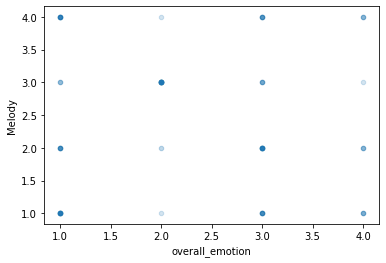

In [16]:
ax1 = design_mat.plot.scatter(x="overall_emotion", y="Melody", alpha = 0.1)

In [21]:
mel1 = 0
mel2 = 0
mel3 = 0
mel4 = 0

tot1 = 0
tot2 = 0
tot3 = 0
tot4 = 0
for i in design_mat.values:
    if i[6] == i[7]:
        if i[6] == 1:
            mel1 = mel1 + 1
        elif i[6] == 2:
            mel2 = mel2 + 1
        elif i[6] == 3:
            mel3 = mel3 + 1
        elif i[6] == 4:
            mel4 = mel4 + 1
    
    if i[6] == 1:
        tot1 = tot1 +1
    elif i[6] == 2:
        tot2 = tot2 + 1
    elif i[6] == 3:
        tot3 = tot3 +1
    else:
        tot4 = tot4 + 1
            


#df = pd.DataFrame(data=[["Sad",(mel1*100)/tot1]["Scary",(mel2*100)/tot2]["Happy",(mel3*100)/tot3]["Peaceful",(mel4*100)/tot4]],columns=["Emotion","Percentage"])
            
    

In [22]:
mel1/tot1

0.5094339622641509

In [23]:
mel2/tot2

0.058823529411764705

In [24]:
mel3/tot3

0.16666666666666666

In [25]:
mel4/tot4

0.16666666666666666

In [120]:
df = pd.DataFrame(data=[["Sad",50.943396],
                       ["Scary",5.882352],
                       ["Happy", 16.67],
                       ["Peaceful",16.67]], columns= ["Melody Emotion","Matching Percentage"])

In [122]:
import plotly.express as px

fig = px.bar(df, x='Melody Emotion', y='Matching Percentage')
fig.update_traces(marker_color = "purple")
fig.show()

In [12]:
design_mat.head()

,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody,overall_emotion
Nro,,,,,,,,
1,4,1,4,4,2,2,4,3
2,5,1,4,1,1,2,2,3
3,2,2,5,1,1,2,1,1
4,1,1,5,4,4,1,2,3
5,3,2,1,3,2,2,1,1


## Question 2

In [125]:
def getCoef(X,y):
    model = LinearRegression()
    model.fit(X,y)
    print("rsquare: ",model.score(X,y))
    print("coeff: ",model.coef_)
    print("intercept: ",model.intercept_)

In [126]:
X = np.array(design_mat.Melody).reshape((-1, 1))

X.shape

y = np.array(design_mat.overall_emotion)

y.shape

getCoef(X,y)

rsquare:  0.0001397858802455465
coeff:  [-0.01130298]
intercept:  2.247409733124019


In [15]:
X = design_mat[['Register', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Register","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.04547078692371054
coeff:  [ 0.13141145 -0.01278832]
intercept:  1.8068409951295412
rsquare:  0.04547078692371054
coeff:  [ 0.13141145 -0.01278832]
intercept:  1.8068409951295412


,Coefficient
Register,0.131411
Melody,-0.012788


In [16]:
X = design_mat[['Timbre', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Timbre","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.0001737072021018582
coeff:  [ 0.00749037 -0.01127163]
intercept:  2.2323529598325433
rsquare:  0.0001737072021018582
coeff:  [ 0.00749037 -0.01127163]
intercept:  2.2323529598325433


,Coefficient
Timbre,0.007490
Melody,-0.011272


In [17]:
X = design_mat[['Soundlevel', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Soundlevel","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.006695919614609913
coeff:  [-0.06148496 -0.01129011]
intercept:  2.423840358856449
rsquare:  0.006695919614609913
coeff:  [-0.06148496 -0.01129011]
intercept:  2.423840358856449


,Coefficient
Soundlevel,-0.061485
Melody,-0.011290


In [18]:
X = design_mat[['Articulation', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Articulation","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.0005685264818624525
coeff:  [ 0.01971201 -0.01209518]
intercept:  2.2012334994682297
rsquare:  0.0005685264818624525
coeff:  [ 0.01971201 -0.01209518]
intercept:  2.2012334994682297


,Coefficient
Articulation,0.019712
Melody,-0.012095


In [19]:
X = design_mat[['Mode', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Mode","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.46780212458164905
coeff:  [-1.43156524 -0.01160263]
intercept:  4.438431191311472
rsquare:  0.46780212458164905
coeff:  [-1.43156524 -0.01160263]
intercept:  4.438431191311472


,Coefficient
Mode,-1.431565
Melody,-0.011603


In [20]:
X = design_mat[['Tempo', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Tempo","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.006106960438998721
coeff:  [ 0.05644728 -0.00919396]
intercept:  2.0783160193637964
rsquare:  0.006106960438998721
coeff:  [ 0.05644728 -0.00919396]
intercept:  2.0783160193637964


,Coefficient
Tempo,0.056447
Melody,-0.009194


## Question 3

In [134]:
minor_key = design_mat[design_mat["Mode"]==2]

In [30]:
del minor_key["Mode"]

In [31]:
minor_key

,Register,Tempo,Soundlevel,Articulation,Timbre,Melody,overall_emotion
Nro,,,,,,,
3,2,5,1,1,2,1,1
5,3,1,3,2,2,1,1
6,2,3,2,4,2,2,4
7,1,2,1,3,1,4,1
9,1,1,4,4,1,1,1
12,1,3,5,1,2,1,1
14,2,1,3,3,3,1,1
15,4,3,3,2,3,3,2
18,3,3,2,1,2,2,1


In [132]:
design_mat["average scary"] = emotion_rating["Scary"]

In [133]:
design_mat

,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody,overall_emotion,count,average happy,average scary
Nro,,,,,,,,,,,
1,4,1,4,4,2,2,4,3,1,4.4667,1.2889
2,5,1,4,1,1,2,2,3,1,5.4444,1.0667
3,2,2,5,1,1,2,1,1,1,1.4889,2.0222
4,1,1,5,4,4,1,2,3,1,4.1111,2.2889
5,3,2,1,3,2,2,1,1,1,1.4667,1.4000
6,2,2,3,2,4,2,2,4,1,2.5111,1.6444
7,1,2,2,1,3,1,4,1,1,1.3333,2.6444
8,6,1,5,1,1,2,3,3,1,4.6667,1.3778
9,1,2,1,4,4,1,1,1,1,1.2222,3.9556


In [24]:
count_sad = 0
count_happy = 0
count_peaceful = 0
count_scary = 0

for i in minor_key.values:
    if i[6] == 1:
        count_sad = count_sad + 1
    elif i[6] == 2:
        count_scary = count_scary + 1
    elif i[6] == 3:
        count_happy = count_happy + 1
    elif i[6] == 4:
        count_peaceful = count_peaceful + 1
    
        

In [25]:
(count_sad*100)/len(minor_key)

60.37735849056604

In [26]:
(count_happy*100)/len(minor_key)

7.547169811320755

In [27]:
(count_peaceful*100)/len(minor_key)

3.7735849056603774

In [28]:
(count_scary*100)/len(minor_key)

28.30188679245283

In [35]:
df = pd.DataFrame(data = [["Sad", 60.377358],
                          ["Happy",7.547169],
                          ["Peaceful",3.773584],
                          ["Scary",28.301886]],
                 columns = ["Emotion", "%ge of minor key first response"] )


In [37]:
import plotly.express as px

fig = px.bar(df, x='Emotion', y='%ge of minor key first response')
fig.show()

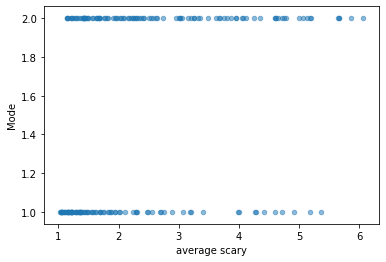

In [135]:
a1 = design_mat.plot.scatter(x="average scary", y= "Mode", alpha = 0.5)

In [136]:
import plotly.express as px

fig = px.scatter(design_mat, x="average scary", y="Mode",
	         size="count",color = "overall_emotion")
fig.show()

## Question 4

In [47]:
design_mat["average happy"] = emotion_rating["Happy"]

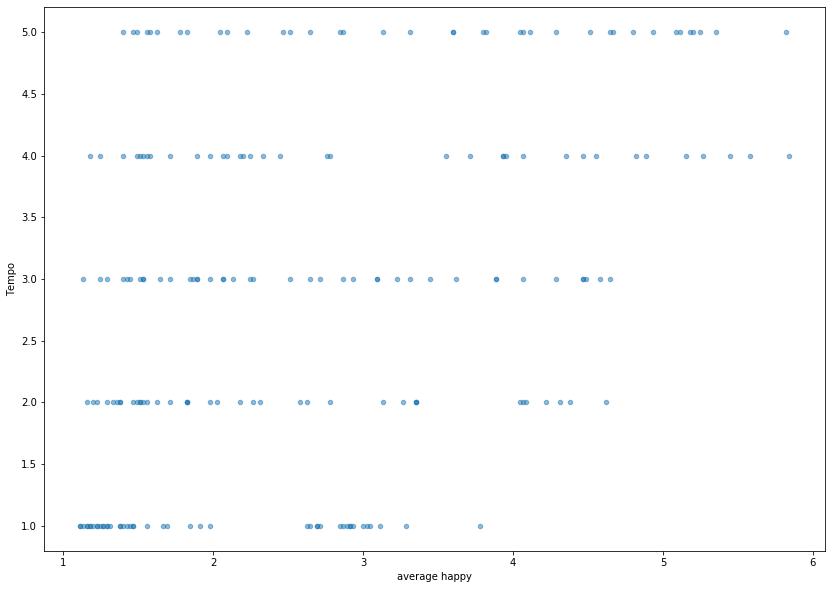

In [48]:
a1 = design_mat.plot.scatter(x="average happy", y= "Tempo", alpha = 0.5,figsize=(14,10))

In [50]:
design_mat["count"] = 1

In [72]:
anotherdf = pd.DataFrame(data = design_mat.groupby(["Tempo","average happy"],as_index=False)["count"].sum(), 
                         columns= ["Tempo","average happy","count"])

In [71]:
design_mat.groupby(["Tempo","average happy"],as_index=False)["count"].sum()

,Tempo,average happy,count
0,1,1.1111,2
1,1,1.1333,1
2,1,1.1556,2
3,1,1.1778,2
4,1,1.2000,1
5,1,1.2222,2
6,1,1.2444,1
7,1,1.2667,2
8,1,1.2889,2
9,1,1.3111,1


In [73]:
anotherdf

,Tempo,average happy,count
0,1,1.1111,2
1,1,1.1333,1
2,1,1.1556,2
3,1,1.1778,2
4,1,1.2000,1
5,1,1.2222,2
6,1,1.2444,1
7,1,1.2667,2
8,1,1.2889,2
9,1,1.3111,1


In [75]:
anotherdf = anotherdf.dropna()

In [103]:
import plotly.express as px

fig = px.scatter(anotherdf, x="average happy", y="Tempo",
	         size="count",color = "count")
fig.show()

In [39]:
design_mat.head

<bound method NDFrame.head of      Register  Mode  Tempo  Soundlevel  Articulation  Timbre  Melody  \
Nro                                                                    
1           4     1      4           4             2       2       4   
2           5     1      4           1             1       2       2   
3           2     2      5           1             1       2       1   
4           1     1      5           4             4       1       2   
5           3     2      1           3             2       2       1   
6           2     2      3           2             4       2       2   
7           1     2      2           1             3       1       4   
8           6     1      5           1             1       2       3   
9           1     2      1           4             4       1       1   
10          2     1      2           2             2       3       1   
11          6     1      1           3             2       1       4   
12          1     2      3        

In [58]:
design_mat.groupby(["Tempo"])["average happy"].sum()

Tempo
1     89.8889
2     93.1113
3    108.3331
4    111.6891
5    130.7332
Name: average happy, dtype: float64

In [101]:
df = pd.DataFrame(data = [[1,1.954107],
                        [2,2.387469],
                          [3,2.642271],
                          [4, 3.102475],
                          [5,3.440347]],
                 columns=["Tempo","Mean average happy ratings"])

In [119]:
import plotly.express as px

fig = px.bar(df, x='Tempo', y='Mean average happy ratings')
fig.show()

In [59]:
design_mat.groupby(["Tempo"])["average happy"].mean()

Tempo
1    1.954107
2    2.387469
3    2.642271
4    3.102475
5    3.440347
Name: average happy, dtype: float64

## Question 5

In [60]:
design_mat.groupby(["overall_emotion"])["Melody"].count()

overall_emotion
1    68
2    44
3    64
4    24
Name: Melody, dtype: int64

In [85]:
len(design_mat)

200

In [89]:
df = pd.DataFrame(data = [["Sad",(68*100)/200],
                         ["Scary", (44*100)/200],
                         ["Happy",(64*100)/200],
                         ["Peaceful",(24*100)/200]],
                 columns = ["Emotion","Percentage of first response"])

In [90]:
df

,Emotion,Percentage of first response
0,Sad,34.0
1,Scary,22.0
2,Happy,32.0
3,Peaceful,12.0


In [99]:
import plotly.express as px

fig = px.bar(df, x='Emotion', y='Percentage of first response')
fig.update_traces(marker_color = "purple")
fig.show()

In [105]:
sadtunes = design_mat[design_mat["Melody"]==1]

In [130]:
sadtunes[sadtunes["Tempo"]==5][sadtunes["Mode"] == 2][sadtunes["Register"]==1]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody,overall_emotion,count,average happy
Nro,,,,,,,,,,
95,1,2,5,3,2,3,1,2,1,1.5778
